In [1]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import re
import math
from tqdm import tqdm
from datetime import datetime

plt.rcParams["font.family"] = 'Malgun Gothic'

## 수출 + 인구 + 경제

In [2]:
export = pd.read_csv("데이터/export.csv")
population = pd.read_csv("데이터/population.csv")
gdp = pd.read_csv("데이터/gdp.csv")
salary = pd.read_csv("데이터/salary.csv")
gdp_indiv = pd.read_csv("데이터/gdp_indiv.csv")
gdp_growth = pd.read_csv("데이터/gdp_growth.csv", encoding='cp949')

In [3]:
export.loc[(export['국가'] == '중국')]

,기간,국가,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
1431,22-Sep,중국,903090,부분품과 부속품,24988,18564,29596,7563,11001
1432,22-Oct,중국,903090,부분품과 부속품,17514,11407,171456,6245,5162
1433,22-Nov,중국,903090,부분품과 부속품,26961,23904,174899,9355,14550
1434,22-Dec,중국,903090,부분품과 부속품,12701,16698,86883,8395,8303
1435,23-Jan,중국,903090,부분품과 부속품,5743,9745,12212,4652,5093
1436,23-Feb,중국,903090,부분품과 부속품,10239,12331,9002,5133,7198
1437,23-Mar,중국,903090,부분품과 부속품,25978,16424,13691,6909,9514
1438,23-Apr,중국,903090,부분품과 부속품,39989,27546,19394,8499,19047
1439,23-May,중국,903090,부분품과 부속품,34723,31068,175060,10565,20503
1440,23-Jun,중국,903090,부분품과 부속품,31249,17464,11301,7295,10169


In [4]:
export

,기간,국가,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,22-Sep,네덜란드,903040,전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk mete...,4,5,0,0,5
1,22-Sep,노르웨이,903040,전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk mete...,8,4,0,0,4
2,22-Sep,대만,903040,전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk mete...,7,8,154,397,-389
3,22-Sep,덴마크,903040,전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk mete...,15,15,0,0,15
4,22-Sep,독일,903040,전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk mete...,227,164,1109,3407,-3243
...,...,...,...,...,...,...,...,...,...
1470,21-Apr,중국,903090,부분품과 부속품,18781,18681,10635,3739,14941
1471,21-May,중국,903090,부분품과 부속품,18389,22067,14276,6317,15750
1472,21-Jun,중국,903090,부분품과 부속품,26724,19613,9516,6180,13433
1473,21-Jul,중국,903090,부분품과 부속품,36462,21595,9515,9404,12191


In [5]:
export['HS코드'].unique()

array([903040, 903090], dtype=int64)

In [7]:
export[export['HS코드']==903090]  #중국 HS코드: 903090, 그외: 903040 

,기간,국가,HS코드,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
1431,22-Sep,중국,903090,부분품과 부속품,24988,18564,29596,7563,11001
1432,22-Oct,중국,903090,부분품과 부속품,17514,11407,171456,6245,5162
1433,22-Nov,중국,903090,부분품과 부속품,26961,23904,174899,9355,14550
1434,22-Dec,중국,903090,부분품과 부속품,12701,16698,86883,8395,8303
1435,23-Jan,중국,903090,부분품과 부속품,5743,9745,12212,4652,5093
1436,23-Feb,중국,903090,부분품과 부속품,10239,12331,9002,5133,7198
1437,23-Mar,중국,903090,부분품과 부속품,25978,16424,13691,6909,9514
1438,23-Apr,중국,903090,부분품과 부속품,39989,27546,19394,8499,19047
1439,23-May,중국,903090,부분품과 부속품,34723,31068,175060,10565,20503
1440,23-Jun,중국,903090,부분품과 부속품,31249,17464,11301,7295,10169


In [8]:
#export 처리 
##기간: 날짜형으로 바꾸고, 년-월 분할
export['날짜'] = pd.to_datetime(export['기간'], format='%y-%b')
export['년'] = export['날짜'].dt.year
export['월'] = export['날짜'].dt.month

##sort 날짜 > 국가 
export = export.sort_values(by=['날짜', '국가'])

In [9]:
##수출, 수입 금액을 백만불 단위로 변환
export['수출 금액'] = export['수출 금액'] * 1000
export['수입 금액'] = export['수입 금액'] * 1000

##무역수지 단위 수정
export['무역수지'] = export['수출 금액'] - export['수입 금액']

##무역비율 = 수출 금액/수입 금액 
export['무역비율'] = export['수출 금액'] / export['수입 금액']

In [10]:
##불필요 칼럼 제거 
export = export[['년', '월', '국가', '수출 금액', '수입 금액', '무역수지', '무역비율']]

In [11]:
export.head()

,년,월,국가,수출 금액,수입 금액,무역수지,무역비율
777,2020,1,네덜란드,19000,5000,14000,3.800000
778,2020,1,대만,17000,188000,-171000,0.090426
779,2020,1,덴마크,3000,0,3000,inf
780,2020,1,독일,158000,2293000,-2135000,0.068905
781,2020,1,라트비아,0,2000,-2000,0.000000


In [12]:
export[export['국가']=='네덜란드']

,년,월,국가,수출 금액,수입 금액,무역수지,무역비율
777,2020,1,네덜란드,19000,5000,14000,3.800000
809,2020,2,네덜란드,16000,1000,15000,16.000000
839,2020,3,네덜란드,119000,3000,116000,39.666667
871,2020,4,네덜란드,417000,2000,415000,208.500000
900,2020,5,네덜란드,0,31000,-31000,0.000000
932,2020,6,네덜란드,9000,0,9000,inf
968,2020,7,네덜란드,0,28000,-28000,0.000000
1002,2020,8,네덜란드,18000,0,18000,inf
1031,2020,9,네덜란드,0,5000,-5000,0.000000
1063,2020,10,네덜란드,178000,0,178000,inf


In [13]:
#population 처리
##국가 열을 제외한 열들을 행으로 변환
population_melt = population.melt(id_vars=['국가'], var_name='속성', value_name='값')

In [14]:
##속성 열에서 연도 추출하여 년 열 만들기
population_melt['년'] = population_melt['속성'].str.extract('(\d{4})').astype(int)


In [15]:
##정리 
population_melt['카테고리'] = population_melt['속성'].str.split(' ').str[1]
population_melt = population_melt.dropna(subset=['값'])
population_df = population_melt.pivot_table(index=['국가', '년'], columns='카테고리', values='값', aggfunc='first').reset_index()

In [16]:
##rename columns
population_df = population_df.rename(columns={'총인구': '총인구수',
                                        '0~14세': '0~14세인구비율', 
                                        '15~64세': '15~64세인구비율', 
                                        '65세이상': '65세이상인구비율', 
                                        '연간': '연간_인구증가비율'})

In [17]:
##불필요 칼럼 제거 
population = population_df[['국가', '년', '0~14세인구비율', '15~64세인구비율', '65세이상인구비율', '연간_인구증가비율', '총인구수']]

In [18]:
##extract numeric values
def extract_numeric_value(text):
    numeric_part = re.search(r'[\d.]+', text)
    if numeric_part:
        return float(numeric_part.group())
    else:
        return None

columns_to_extract = ['0~14세인구비율', '15~64세인구비율', '65세이상인구비율', '연간_인구증가비율', '총인구수']

for column in columns_to_extract:
    population[column] = population[column].apply(extract_numeric_value)

C:\Users\subin\AppData\Local\Temp\ipykernel_21540\3231122232.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population[column] = population[column].apply(extract_numeric_value)


In [19]:
population.head()

카테고리,국가,년,0~14세인구비율,15~64세인구비율,65세이상인구비율,연간_인구증가비율,총인구수
0,가나,2020,37.582,59.013,3.406,2.066,32180401.0
1,가나,2021,37.255,59.268,3.477,2.008,32833031.0
2,가나,2022,36.937,59.508,3.555,1.939,33475870.0
3,가봉,2020,36.527,59.568,3.904,2.196,2292573.0
4,가봉,2021,36.423,59.679,3.898,2.098,2341179.0


In [21]:
#gdp 처리 
gdp

,국가,2020,2021,2022
0,가나,70.0,79.2,72.8
1,가봉,15.3,20.2,21.1
2,가이아나,5.5,8.0,15.4
3,감비아,1.8,2.0,2.3
4,과테말라,77.7,86.1,95.0
...,...,...,...,...
209,핀란드,271.9,296.4,280.8
210,필리핀,361.8,394.1,404.3
211,헝가리,157.2,182.3,178.8
212,홍콩,344.9,368.9,359.8


In [22]:
#정리 
gdp_melt = gdp.melt(id_vars=['국가'], var_name='년', value_name='GDP')

In [23]:
#단위로 계산 
gdp_melt['GDP'] = gdp_melt['GDP'] * 1000000000

In [24]:
gdp = gdp_melt
gdp.head()

,국가,년,GDP
0,가나,2020,7.000000e+10
1,가봉,2020,1.530000e+10
2,가이아나,2020,5.500000e+09
3,감비아,2020,1.800000e+09
4,과테말라,2020,7.770000e+10


In [25]:
#salary 정리 
##국가 열을 제외한 열들을 행으로 변환
salary_melt = salary.melt(id_vars=['국가'], var_name='속성', value_name='값')

In [26]:
##속성 열에서 연도 추출하여 년 열 만들기
salary_melt['년'] = salary_melt['속성'].str.extract('(\d{4})').astype(int)

In [27]:
##정리 
salary_melt['카테고리'] = salary_melt['속성'].str.split(' ').str[1]
salary_melt = salary_melt.dropna(subset=['값'])
salary_df = salary_melt.pivot_table(index=['국가', '년'], columns='카테고리', values='값', aggfunc='first').reset_index()

In [28]:
##rename columns
salary_df = salary_df.rename(columns={'국민총소득(Atlas법)': '국민총소득',
                                        '1인당': '1인당국민총소득'})

In [29]:
##불필요 칼럼 제거 
salary = salary_df[['국가', '년', '국토면적', '인구밀도', '국민총소득', '1인당국민총소득']]

In [30]:
##extract numeric value
def extract_numeric_value(text):
    numeric_part = re.search(r'[\d.]+', str(text))
    if numeric_part:
        return float(numeric_part.group())
    else:
        return None

columns_to_extract = ['국토면적', '인구밀도', '국민총소득', '1인당국민총소득']

for column in columns_to_extract:
    salary[column] = salary[column].apply(extract_numeric_value)

C:\Users\subin\AppData\Local\Temp\ipykernel_21540\1839985139.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary[column] = salary[column].apply(extract_numeric_value)


In [31]:
salary.head()

카테고리,국가,년,국토면적,인구밀도,국민총소득,1인당국민총소득
0,가나,2020,238530.0,141.432,7.186322e+10,2230.0
1,가나,2021,NaN,NaN,7.540194e+10,2300.0
2,가나,2022,NaN,NaN,7.865782e+10,2350.0
3,가봉,2020,267670.0,8.897,1.564774e+10,6830.0
4,가봉,2021,NaN,NaN,1.507634e+10,6440.0


In [32]:
#gdp_indiv 처리 
##정리 
gdp_indiv_melt = gdp_indiv.melt(id_vars=['국가'], var_name='년', value_name='1인GDP')

In [33]:
gdp_indiv = gdp_indiv_melt
gdp_indiv.head()

,국가,년,1인GDP
0,가나,2020,2177.0
1,가봉,2020,6680.0
2,가이아나,2020,6863.0
3,감비아,2020,704.0
4,과테말라,2020,4610.0


In [34]:
#gdp_growth 정리 
##정리 
gdp_growth_melt = gdp_growth.melt(id_vars=['국가별'], var_name='년', value_name='경제성장률')

In [35]:
##rename columns
gdp_growth_melt = gdp_growth_melt.rename(columns={'국가별': '국가'})

In [36]:
gdp_growth = gdp_growth_melt
gdp_growth.head()

,국가,년,경제성장률
0,세계,2020,-3.1
1,아시아,2020,NaN
2,대한민국,2020,-0.7
3,아프가니스탄,2020,-2.4
4,아르메니아,2020,-7.2


#### 데이터프레임 합치기

In [37]:
export.head()

,년,월,국가,수출 금액,수입 금액,무역수지,무역비율
777,2020,1,네덜란드,19000,5000,14000,3.800000
778,2020,1,대만,17000,188000,-171000,0.090426
779,2020,1,덴마크,3000,0,3000,inf
780,2020,1,독일,158000,2293000,-2135000,0.068905
781,2020,1,라트비아,0,2000,-2000,0.000000


In [38]:
population.head()

카테고리,국가,년,0~14세인구비율,15~64세인구비율,65세이상인구비율,연간_인구증가비율,총인구수
0,가나,2020,37.582,59.013,3.406,2.066,32180401.0
1,가나,2021,37.255,59.268,3.477,2.008,32833031.0
2,가나,2022,36.937,59.508,3.555,1.939,33475870.0
3,가봉,2020,36.527,59.568,3.904,2.196,2292573.0
4,가봉,2021,36.423,59.679,3.898,2.098,2341179.0


In [39]:
gdp.head()

,국가,년,GDP
0,가나,2020,7.000000e+10
1,가봉,2020,1.530000e+10
2,가이아나,2020,5.500000e+09
3,감비아,2020,1.800000e+09
4,과테말라,2020,7.770000e+10


In [40]:
salary.head()

카테고리,국가,년,국토면적,인구밀도,국민총소득,1인당국민총소득
0,가나,2020,238530.0,141.432,7.186322e+10,2230.0
1,가나,2021,NaN,NaN,7.540194e+10,2300.0
2,가나,2022,NaN,NaN,7.865782e+10,2350.0
3,가봉,2020,267670.0,8.897,1.564774e+10,6830.0
4,가봉,2021,NaN,NaN,1.507634e+10,6440.0


In [41]:
gdp_indiv.head()

,국가,년,1인GDP
0,가나,2020,2177.0
1,가봉,2020,6680.0
2,가이아나,2020,6863.0
3,감비아,2020,704.0
4,과테말라,2020,4610.0


In [42]:
gdp_growth.head()

,국가,년,경제성장률
0,세계,2020,-3.1
1,아시아,2020,NaN
2,대한민국,2020,-0.7
3,아프가니스탄,2020,-2.4
4,아르메니아,2020,-7.2


In [43]:
#change 년 to numeric
gdp['년'] = gdp['년'].apply(pd.to_numeric, errors='coerce')
gdp_indiv['년'] = gdp_indiv['년'].apply(pd.to_numeric, errors='coerce')
gdp_growth['년'] = gdp_growth['년'].apply(pd.to_numeric, errors='coerce')

In [46]:
export = export.sort_values(by='국가', ascending=True)

In [47]:
export['국가'].unique()

array(['괌', '그리스', '기타국', '나이지리아', '남아프리카공화국', '네덜란드', '노르웨이', '뉴질랜드',
       '니카라과', '대만', '덴마크', '도미니카 공화국', '독일', '라트비아', '러시아 연방', '루마니아',
       '르완다', '리투아니아', '말레이시아', '멕시코', '모로코', '몽골', '미국', '방글라데시', '베트남',
       '벨기에', '벨라루스', '보츠와나', '볼리비아', '부탄', '불가리아', '불령 리유니온 코모도 제도',
       '브라질', '사우디아라비아', '사이프러스', '세르비아', '스와질랜드', '스웨덴', '스위스', '스페인',
       '슬로베니아', '싱가포르', '아랍에미리트 연합', '아르헨티나', '아이티', '아일랜드', '알제리',
       '에스토니아', '에쿠아도르', '엘살바도르', '영국', '오스트리아', '우루과이', '우즈베키스탄',
       '우크라이나', '이라크', '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국',
       '체코공화국', '칠레', '캄보디아', '캐나다', '콜롬비아', '쿠웨이트', '크로아티아', '태국', '튀니지',
       '튀르키예', '파키스탄', '페루', '포루투갈', '폴란드', '프랑스', '피지', '핀란드', '필리핀',
       '헝가리', '호주', '홍콩'], dtype=object)

In [45]:
gdp['국가'].unique()

array(['가나', '가봉', '가이아나', '감비아', '과테말라', '괌', '그레나다', '그리스', '그린란드',
       '기니', '기니비사우', '나미비아', '나우루', '나이지리아', '남아메리카', '남아프리카공화국', '네덜란드',
       '네팔', '노르웨이', '뉴질랜드', '뉴칼레도니아', '니제르', '니카라과', '대만', '대한민국', '덴마크',
       '도미니카공화국', '도미니카연방', '독일', '동티모르', '라오스', '라이베리아', '라트비아', '러시아',
       '레바논', '레소토', '루마니아', '룩셈부르크', '르완다', '리비아', '리투아니아', '리히텐슈타인',
       '마다가스카르', '마셜제도', '마카오', '말라위', '말레이시아', '말리', '맨섬', '멕시코', '모나코',
       '모로코', '모리셔스', '모리타니', '모잠비크', '몬테네그로', '몰도바', '몰디브', '몰타', '몽골',
       '미국', '미국령버진아일랜드', '미국령사모아', '미얀마', '미크로네시아', '바누아투', '바레인',
       '바베이도스', '바하마', '방글라데시', '버뮤다', '베냉', '베트남', '벨기에', '벨라루스', '벨리즈',
       '보스니아-헤르체고비나', '보츠와나', '볼리비아', '부룬디', '부르키나파소', '부탄', '북마리아나제도',
       '북마케도니아', '북아메리카', '불가리아', '브라질', '브루나이', '사모아', '사우디아라비아', '산마리노',
       '상투메프린시페', '샤넬군도', '세네갈', '세르비아', '세이셸', '세인트루시아', '세인트빈센트그레나딘',
       '세인트키츠네비스', '소말리아', '솔로몬제도', '수단', '수리남', '스리랑카', '스웨덴', '스위스',
       '스페인', '슬로바키아', '슬로베니아', '시리아', '시에라리온', '싱가포르', '

In [48]:
#export 국가 수정 
export['국가'] = export['국가'].replace({'러시아 연방': '러시아', 
                                     '도미니카 공화국': '도미니카공화국', 
                                     '아랍에미리트 연합': '아랍에미리트',
                                     '포루투갈': '포르투갈',
                                     '체코공화국': '체코'})
export['국가'].unique()  #잘 수정됐는지 확인 

array(['괌', '그리스', '기타국', '나이지리아', '남아프리카공화국', '네덜란드', '노르웨이', '뉴질랜드',
       '니카라과', '대만', '덴마크', '도미니카공화국', '독일', '라트비아', '러시아', '루마니아', '르완다',
       '리투아니아', '말레이시아', '멕시코', '모로코', '몽골', '미국', '방글라데시', '베트남', '벨기에',
       '벨라루스', '보츠와나', '볼리비아', '부탄', '불가리아', '불령 리유니온 코모도 제도', '브라질',
       '사우디아라비아', '사이프러스', '세르비아', '스와질랜드', '스웨덴', '스위스', '스페인', '슬로베니아',
       '싱가포르', '아랍에미리트', '아르헨티나', '아이티', '아일랜드', '알제리', '에스토니아', '에쿠아도르',
       '엘살바도르', '영국', '오스트리아', '우루과이', '우즈베키스탄', '우크라이나', '이라크', '이스라엘',
       '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코', '칠레', '캄보디아',
       '캐나다', '콜롬비아', '쿠웨이트', '크로아티아', '태국', '튀니지', '튀르키예', '파키스탄', '페루',
       '포르투갈', '폴란드', '프랑스', '피지', '핀란드', '필리핀', '헝가리', '호주', '홍콩'],
      dtype=object)

In [49]:
#데이터프레임 합치기 
df1 = pd.merge(export, population, on=['년', '국가'], how='left')
df2 = pd.merge(df1, gdp, on=['년', '국가'], how='left')
df3 = pd.merge(df2, salary, on=['년', '국가'], how='left')
df4 = pd.merge(df3, gdp_indiv, on=['년', '국가'], how='left')
df5 = pd.merge(df4, gdp_growth, on=['년', '국가'], how='left')

In [50]:
df5

,년,월,국가,수출 금액,수입 금액,무역수지,무역비율,0~14세인구비율,15~64세인구비율,65세이상인구비율,연간_인구증가비율,총인구수,GDP,국토면적,인구밀도,국민총소득,1인당국민총소득,1인GDP,경제성장률
0,2022,3,괌,0,0,0,NaN,26.053,62.106,11.841,0.725,171774.0,0.000000e+00,NaN,NaN,NaN,NaN,0.0,-
1,2020,9,괌,3000,0,3000,inf,26.548,62.342,11.110,0.359,169231.0,5.900000e+09,540.0,313.391,NaN,NaN,34781.0,-11.4
2,2023,1,그리스,2000,0,2000,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,6,그리스,0,1000,-1000,0.000000,14.177,63.641,22.181,0.215,10698599.0,1.889000e+11,131960.0,82.999,1.921275e+11,17960.0,17659.0,-9.0
4,2023,2,그리스,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2021,4,홍콩,692000,3000,689000,230.666667,12.174,68.223,19.603,0.912,7413100.0,3.689000e+11,NaN,NaN,4.030818e+11,54370.0,49765.0,6.4
1471,2022,2,홍콩,82000,0,82000,inf,12.041,67.487,20.473,0.908,7346100.0,3.598000e+11,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5
1472,2020,4,홍콩,29000,0,29000,inf,12.244,68.996,18.760,0.359,7481000.0,3.449000e+11,1110.0,7124.762,3.631942e+11,48550.0,46109.0,-6.5
1473,2023,5,홍콩,80000,8000,72000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#2022년 데이터만 가져오기
#df5 = df5[df5['년'] != 2023]
df5 = df5[df5['년'] == 2022]

In [52]:
df5['년'].unique()

array([2022])

In [53]:
df5

,년,월,국가,수출 금액,수입 금액,무역수지,무역비율,0~14세인구비율,15~64세인구비율,65세이상인구비율,연간_인구증가비율,총인구수,GDP,국토면적,인구밀도,국민총소득,1인당국민총소득,1인GDP,경제성장률
0,2022,3,괌,0,0,0,NaN,26.053,62.106,11.841,0.725,171774.0,0.000000e+00,NaN,NaN,NaN,NaN,0.0,-
7,2022,12,나이지리아,5000,0,5000,inf,43.045,53.981,2.974,2.380,218541212.0,4.774000e+11,NaN,NaN,4.686532e+11,2140.0,2184.0,3.3
9,2022,10,남아프리카공화국,3000,0,3000,inf,28.551,65.556,5.893,0.841,59893885.0,4.059000e+11,NaN,NaN,4.063070e+11,6780.0,6776.0,2.0
13,2022,7,네덜란드,7000,0,7000,inf,15.425,64.260,20.315,0.965,17703090.0,9.911000e+11,NaN,NaN,1.016725e+12,57430.0,55985.0,4.5
14,2022,4,네덜란드,3000,0,3000,inf,15.425,64.260,20.315,0.965,17703090.0,9.911000e+11,NaN,NaN,1.016725e+12,57430.0,55985.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2022,4,홍콩,222000,0,222000,inf,12.041,67.487,20.473,0.908,7346100.0,3.598000e+11,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5
1451,2022,3,홍콩,582000,94000,488000,6.191489,12.041,67.487,20.473,0.908,7346100.0,3.598000e+11,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5
1454,2022,12,홍콩,86000,35000,51000,2.457143,12.041,67.487,20.473,0.908,7346100.0,3.598000e+11,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5
1467,2022,1,홍콩,119000,45000,74000,2.644444,12.041,67.487,20.473,0.908,7346100.0,3.598000e+11,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5


#### 파생변수 

In [54]:
df5['수출 무역의존도'] = df5['수출 금액'] / (df5['GDP'] / 12)
df5['수입 무역의존도'] = df5['수입 금액'] / (df5['GDP'] / 12)
df5['1인당국민총소득_비율'] = df5['1인당국민총소득'] / df5['국민총소득']
df5['1인당GDP_비율'] = df5['1인GDP'] / df5['GDP']

C:\Users\subin\AppData\Local\Temp\ipykernel_21540\1292256775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['수출 무역의존도'] = df5['수출 금액'] / (df5['GDP'] / 12)
C:\Users\subin\AppData\Local\Temp\ipykernel_21540\1292256775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['수입 무역의존도'] = df5['수입 금액'] / (df5['GDP'] / 12)
C:\Users\subin\AppData\Local\Temp\ipykernel_21540\1292256775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [55]:
df5

,년,월,국가,수출 금액,수입 금액,무역수지,무역비율,0~14세인구비율,15~64세인구비율,65세이상인구비율,...,국토면적,인구밀도,국민총소득,1인당국민총소득,1인GDP,경제성장률,수출 무역의존도,수입 무역의존도,1인당국민총소득_비율,1인당GDP_비율
0,2022,3,괌,0,0,0,NaN,26.053,62.106,11.841,...,NaN,NaN,NaN,NaN,0.0,-,NaN,NaN,NaN,NaN
7,2022,12,나이지리아,5000,0,5000,inf,43.045,53.981,2.974,...,NaN,NaN,4.686532e+11,2140.0,2184.0,3.3,1.256808e-07,0.000000,4.566276e-09,4.574780e-09
9,2022,10,남아프리카공화국,3000,0,3000,inf,28.551,65.556,5.893,...,NaN,NaN,4.063070e+11,6780.0,6776.0,2.0,8.869180e-08,0.000000,1.668689e-08,1.669377e-08
13,2022,7,네덜란드,7000,0,7000,inf,15.425,64.260,20.315,...,NaN,NaN,1.016725e+12,57430.0,55985.0,4.5,8.475431e-08,0.000000,5.648528e-08,5.648774e-08
14,2022,4,네덜란드,3000,0,3000,inf,15.425,64.260,20.315,...,NaN,NaN,1.016725e+12,57430.0,55985.0,4.5,3.632328e-08,0.000000,5.648528e-08,5.648774e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,2022,4,홍콩,222000,0,222000,inf,12.041,67.487,20.473,...,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5,7.404113e-06,0.000000,1.361353e-07,1.361423e-07
1451,2022,3,홍콩,582000,94000,488000,6.191489,12.041,67.487,20.473,...,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5,1.941078e-05,0.000003,1.361353e-07,1.361423e-07
1454,2022,12,홍콩,86000,35000,51000,2.457143,12.041,67.487,20.473,...,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5,2.868260e-06,0.000001,1.361353e-07,1.361423e-07
1467,2022,1,홍콩,119000,45000,74000,2.644444,12.041,67.487,20.473,...,NaN,NaN,3.993821e+11,54370.0,48984.0,-3.5,3.968872e-06,0.000002,1.361353e-07,1.361423e-07


In [56]:
df5.isna().sum()

년                0
월                0
국가               0
수출 금액            0
수입 금액            0
무역수지             0
무역비율            10
0~14세인구비율       27
15~64세인구비율      27
65세이상인구비율       27
연간_인구증가비율       27
총인구수            27
GDP             15
국토면적           397
인구밀도           397
국민총소득           28
1인당국민총소득        28
1인GDP           15
경제성장률           15
수출 무역의존도        16
수입 무역의존도        16
1인당국민총소득_비율     28
1인당GDP_비율       16
dtype: int64

<Axes: >

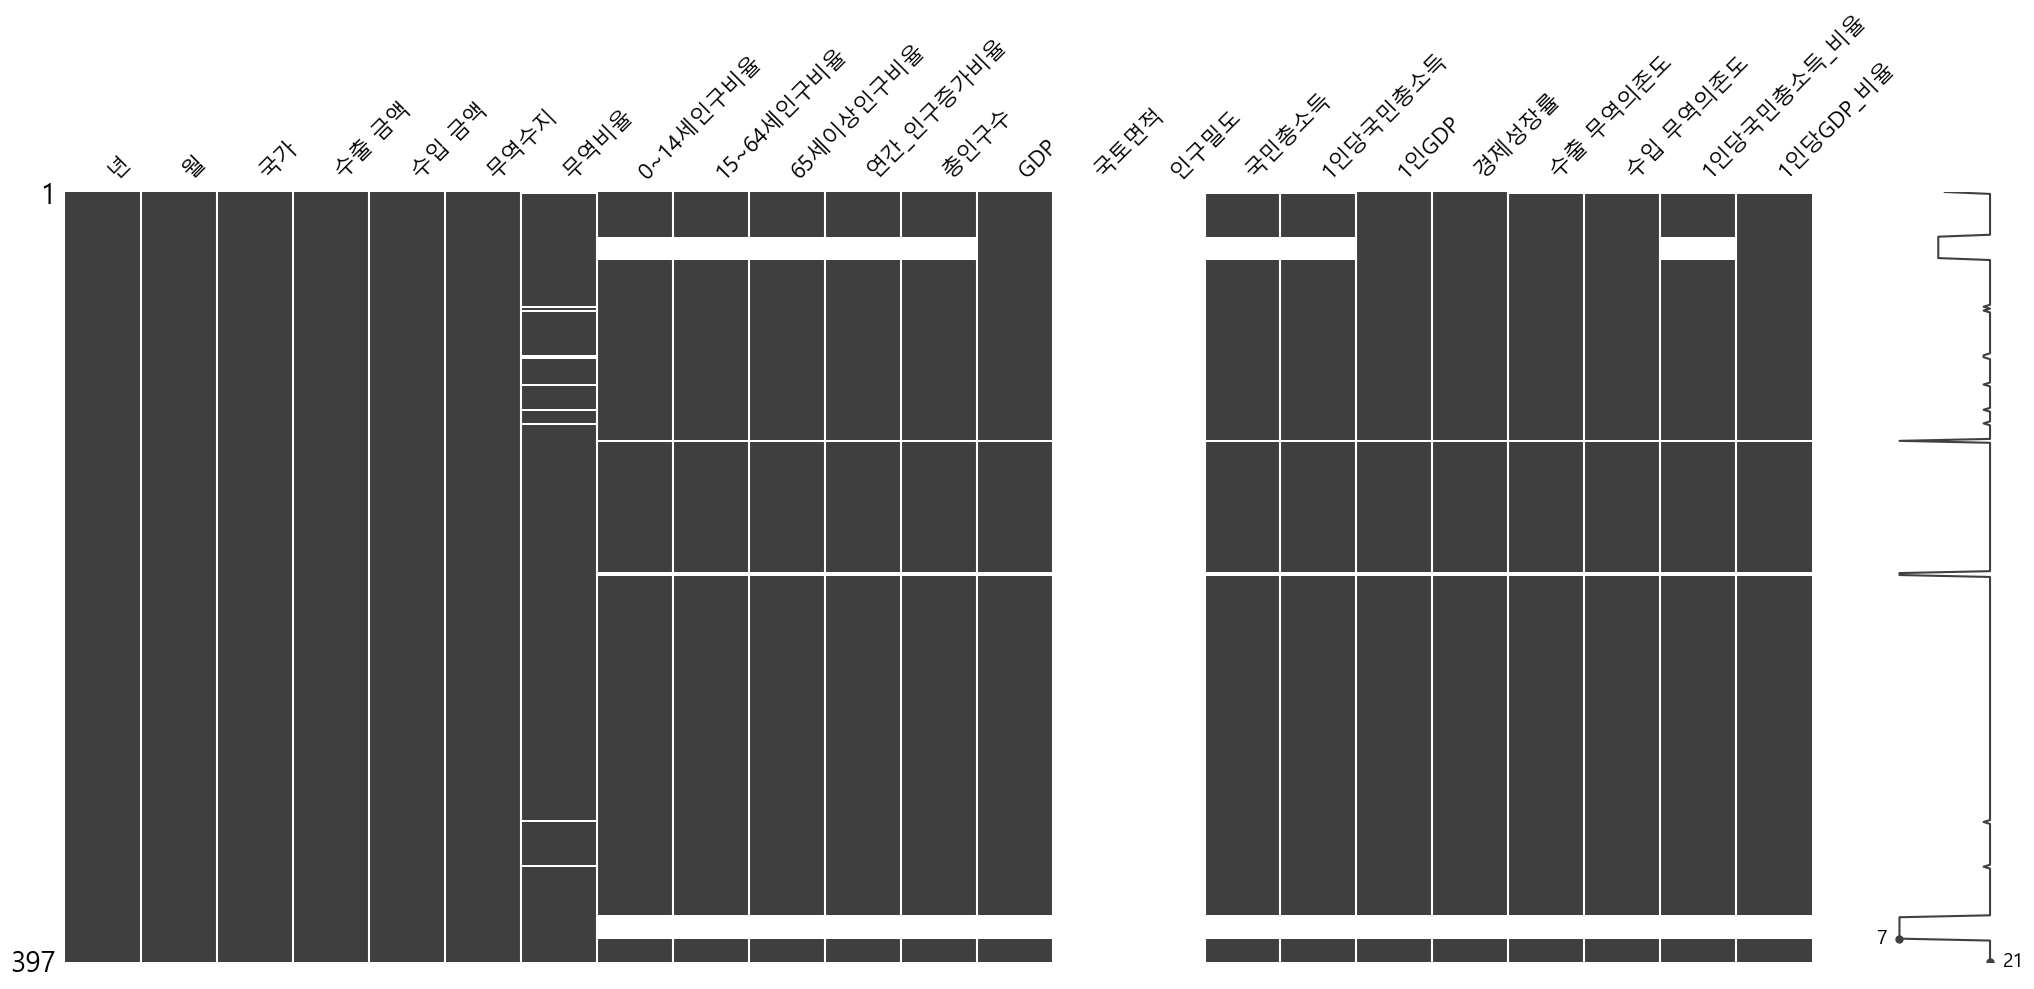

In [57]:
msno.matrix(df5)

In [58]:
#국토면적, 인구밀도 제거 
df5 = df5.drop(['국토면적', '인구밀도'], axis=1)

In [59]:
df5.columns

Index(['년', '월', '국가', '수출 금액', '수입 금액', '무역수지', '무역비율', '0~14세인구비율',
       '15~64세인구비율', '65세이상인구비율', '연간_인구증가비율', '총인구수', 'GDP', '국민총소득',
       '1인당국민총소득', '1인GDP', '경제성장률', '수출 무역의존도', '수입 무역의존도', '1인당국민총소득_비율',
       '1인당GDP_비율'],
      dtype='object')

In [60]:
df5.to_csv('데이터/df1.csv', index=False)

## 매출

In [61]:
sales = pd.read_csv('데이터/sales.csv')

#### 파생변수

In [62]:
#사용칼럼 추출
sales_cols = ['날짜', '품목그룹', '통화', '수량', '외화판매금액', '단가', 'Nation', 'BUYER']
sales = sales[sales_cols]

In [63]:
#날짜: 날짜형으로 바꾸고, 년-월-일 분할
sales['날짜'] = pd.to_datetime(sales['날짜'], format='%Y-%m-%d')
sales['년'] = sales['날짜'].dt.year
sales['월'] = sales['날짜'].dt.month
sales['일'] = sales['날짜'].dt.day

In [67]:
#Nation: 국가 한국어로 변화
translation_dict = {'China': '중국', 'CANADA': '캐나다', 'USA': '미국', 'HongKong': '홍콩', 'Indonesia':'인도네시아', 
                   'United Kingdom': '영국', 'Spain': '스페인', 'JAPAN': '일본', 'Vietnam': '베트남', 'Mexico': '멕시코',
                   'India': '인도', 'Taiwan': '대만', 'Thailand': '태국', 'Ukraine': '우크라이나', 'Malaysia': '말레이시아', 'RUSSIA': '러시아',
                   'Israel': '이스라엘', 'Denmark': '덴마크', 'Philiphines': '필리핀', 'Austral': '호주', 'Poland': '폴란드',
                   'Lithuania': '리투아니아', 'KOREA': '대한민국', 'Netherland': '네덜란드', 'Czech': '체코', 'Hungary': '헝가리', 'Italy': '이탈리아',
                   'Switzerland': '스위스', 'Brazil': '브라질', 'Argentina': '아르헨티나', 'FINLAND': '핀란드', 'Newzealand': '뉴질란드', 
                   'Ireland': '아일랜드', 'Sweden': '스웨덴', 'Germany': '독일', 'Romania': '루마니아', 'Slovenia': '슬로베니아', 
                   'United Arab Emirates': '아랍에미리트', 'France': '프랑스', 'Singapore': '싱가포르', 'Turkey': '튀르키예', 'Serbia': '세르비아',
                   'Austria': '오스트리아', 'South Africa': '남아프리카공화국', 'Greece': '그리스', 'Tunisia': '튀니지', 'England': '영국'}

sales['국가'] = sales['Nation'].replace(translation_dict)

In [69]:
sales = sales.sort_values(by='국가', ascending=True)
sales['국가'].unique()

array(['그리스', '남아프리카공화국', '네덜란드', '뉴질란드', '대만', '대한민국', '덴마크', '독일',
       '러시아', '루마니아', '리투아니아', '말레이시아', '멕시코', '미국', '베트남', '브라질', '세르비아',
       '스웨덴', '스위스', '스페인', '슬로베니아', '싱가포르', '아랍에미리트', '아르헨티나', '아일랜드',
       '영국', '오스트리아', '우크라이나', '이스라엘', '이탈리아', '인도', '인도네시아', '일본', '중국',
       '체코', '캐나다', '태국', '튀니지', '튀르키예', '폴란드', '프랑스', '핀란드', '필리핀',
       '헝가리', '호주', '홍콩', nan], dtype=object)

In [64]:
df5['국가'].unique()

array(['괌', '나이지리아', '남아프리카공화국', '네덜란드', '노르웨이', '뉴질랜드', '대만', '덴마크',
       '독일', '라트비아', '러시아', '루마니아', '리투아니아', '말레이시아', '멕시코', '몽골', '미국',
       '방글라데시', '베트남', '벨기에', '불가리아', '브라질', '사우디아라비아', '사이프러스', '세르비아',
       '스웨덴', '스위스', '스페인', '슬로베니아', '싱가포르', '아랍에미리트', '아르헨티나', '아이티',
       '아일랜드', '알제리', '에스토니아', '에쿠아도르', '엘살바도르', '영국', '오스트리아', '우크라이나',
       '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코', '칠레',
       '캐나다', '쿠웨이트', '크로아티아', '태국', '페루', '폴란드', '프랑스', '피지', '핀란드',
       '필리핀', '헝가리', '호주', '홍콩'], dtype=object)

In [70]:
#환율(파생): 2023-10-09 기준 환율로 계산
## USD=1350원, EUR=1425원 
sales['환율'] = sales['통화'].map({'USD': 1350, 'EUR': 1425, 'KRW': 1})

#실제판매금액(파생): 단가 * 수량 * 환율 
sales['단가'] = pd.to_numeric(sales['단가'].str.replace(',', ''), errors='coerce')
sales['수량'] = pd.to_numeric(sales['수량'].str.replace(',', ''), errors='coerce')
sales['단가'] = sales['단가'].astype(int)
sales['수량'] = sales['수량'].astype(int)

sales['실제판매금액'] = sales['단가'] * sales['수량'] * sales['환율']

In [71]:
#일관성 - 품목그룹에서 '기타'를 'Others'로 바꾸기 
sales.loc[sales['품목그룹'] == '기타', '품목그룹'] = 'Others'
sales['품목그룹'].unique()

array(['Shield box', 'Others', 'Accessories', 'Antenna / RF Couple',
       'FCT', 'TEM CELL', 'Software', 'Tester'], dtype=object)

In [72]:
#품목그룹, 환율 범주형으로 변환 
sales.loc[:, '품목그룹'] = sales['품목그룹'].astype('category')
sales.loc[:, '환율'] = sales['환율'].astype('category')

In [73]:
#이동평균: 가격의 동향을 알아보기 위해 
## '국가' 별로 5일, 10일, 20일 간격의 이동평균 계산
sales = sales.sort_values(by=['국가', '년', '월', '일'])
sales['이동평균_5일'] = sales.groupby('국가')['실제판매금액'].rolling(window=5).mean().reset_index(drop=True)
sales['이동평균_10일'] = sales.groupby('국가')['실제판매금액'].rolling(window=10).mean().reset_index(drop=True)
sales['이동평균_20일'] = sales.groupby('국가')['실제판매금액'].rolling(window=20).mean().reset_index(drop=True)

In [74]:
#계절: 12~2월=겨울, 3~5월=봄, 6~8월=여름, 9~11월=가을
sales['계절'] = sales['월'].apply(lambda x: 
    '겨울' if x in [12, 1, 2] else 
    '봄' if x in [3, 4, 5] else 
    '여름' if x in [6, 7, 8] else 
    '가을'
)
sales['계절'].unique()

array(['겨울', '여름', '가을', '봄'], dtype=object)

In [75]:
#요일 변수 추가 
sales['요일'] = sales['날짜'].dt.day_name()
sales['요일'].unique()

array(['Friday', 'Tuesday', 'Sunday', 'Wednesday', 'Saturday', 'Thursday',
       'Monday'], dtype=object)

In [76]:
#판매금액_대비_수량: (수량)/(실제판매금액)
sales['판매금액_대비_수량'] = sales['수량'] / sales['실제판매금액']

In [77]:
#이전거래후_경과_일수: 국가별로 계산
sales['이전거래후_경과_일수'] = sales.groupby('국가')['날짜'].diff().dt.days

In [78]:
#이전기간_대비_매출증가율: 국가별로 계산 
sales['이전기간_대비_매출증가율'] = sales.groupby('국가')['실제판매금액'].pct_change()

In [79]:
#2022년 데이터만
#sales = sales[sales['년'] != 2023]
sales = sales[sales['년'] == 2022]
sales['년'].unique()

array([2022])

In [80]:
#filter Apple
sales = sales[sales['BUYER'] != 'Apple']

In [81]:
sales[sales['BUYER']=='Apple']

,날짜,품목그룹,통화,수량,외화판매금액,단가,Nation,BUYER,년,월,...,환율,실제판매금액,이동평균_5일,이동평균_10일,이동평균_20일,계절,요일,판매금액_대비_수량,이전거래후_경과_일수,이전기간_대비_매출증가율


In [82]:
sales.columns

Index(['날짜', '품목그룹', '통화', '수량', '외화판매금액', '단가', 'Nation', 'BUYER', '년', '월',
       '일', '국가', '환율', '실제판매금액', '이동평균_5일', '이동평균_10일', '이동평균_20일', '계절',
       '요일', '판매금액_대비_수량', '이전거래후_경과_일수', '이전기간_대비_매출증가율'],
      dtype='object')

In [83]:
#최종 sales, sales_apple
sales = sales[['날짜', '품목그룹', '수량', '단가', '년', '월',
       '일', '국가', '환율', '실제판매금액', '이동평균_5일', '이동평균_10일', '이동평균_20일', '계절',
       '요일', '판매금액_대비_수량', '이전거래후_경과_일수', '이전기간_대비_매출증가율']]

In [84]:
sales

,날짜,품목그룹,수량,단가,년,월,일,국가,환율,실제판매금액,이동평균_5일,이동평균_10일,이동평균_20일,계절,요일,판매금액_대비_수량,이전거래후_경과_일수,이전기간_대비_매출증가율
20347,2022-08-09,Accessories,2,1460,2022,8,9,남아프리카공화국,1350,3942000,0.0,0.0,18072315.0,여름,Tuesday,5.073567e-07,NaN,NaN
20346,2022-08-09,Accessories,2,730,2022,8,9,남아프리카공화국,1350,1971000,0.0,0.0,18275760.0,여름,Tuesday,1.014713e-06,0.0,-0.500000
21459,2022-11-04,Antenna / RF Couple,1,240,2022,11,4,남아프리카공화국,1350,324000,NaN,NaN,NaN,가을,Friday,3.086420e-06,87.0,-0.835616
21456,2022-11-04,Shield box,1,2345,2022,11,4,남아프리카공화국,1350,3165750,NaN,NaN,NaN,가을,Friday,3.158809e-07,0.0,8.770833
21476,2022-11-09,Others,1,3300,2022,11,9,네덜란드,1350,4455000,NaN,NaN,NaN,가을,Wednesday,2.244669e-07,89.0,-0.907821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22365,2022-12-31,Antenna / RF Couple,45,52000,2022,12,31,NaN,1,2340000,NaN,NaN,NaN,겨울,Saturday,1.923077e-05,NaN,NaN
22366,2022-12-31,Antenna / RF Couple,45,52000,2022,12,31,NaN,1,2340000,NaN,NaN,NaN,겨울,Saturday,1.923077e-05,NaN,NaN
22367,2022-12-31,Antenna / RF Couple,45,52000,2022,12,31,NaN,1,2340000,NaN,NaN,NaN,겨울,Saturday,1.923077e-05,NaN,NaN
22368,2022-12-31,Accessories,1,500000,2022,12,31,NaN,1,500000,NaN,NaN,NaN,겨울,Saturday,2.000000e-06,NaN,NaN


In [85]:
sales.to_csv('데이터/df2.csv', index=False)